### Load model mechanisms

In [1]:
modelPath = 'Models/Migliore2014/'
dllPath = 'x86_64/.libs/libnrnmech.so' # OS dependent

from neuron import h
h.nrn_load_dll(modelPath+dllPath)

1.0

### Import required packages

In [2]:
%matplotlib inline
import matplotlib.pyplot as g

from neuronunit.neuron.models import *
from neuronunit.tests import *
import neuronunit.neuroelectro
from quantities import nA, pA, s, ms, mV

In [3]:
import os
os.chdir(modelPath)

### Create a Mitral Cell

In [4]:
from mkmitral import mkmitral
cell = mkmitral(0)
cell.soma

### Create a NeuronUnit model using the cell

In [5]:
mod1 = SingleCellModel(hVar = h, \
                       section = cell.soma, \
                       loc = 0.5, # Current and voltage injection and measurement location on the section \
                       name = "Migliore2014")

mod1.setIntegrationMethod("fixed")  # "fixed" or "variable"
mod1.setTimeStep(1/32.0 * ms) # 2^-n are preferable
mod1.setTolerance(0.001) # 0-0.01 Only needed if "variable"
mod1.setStopTime(2*s)

### Find the desired stimulation response

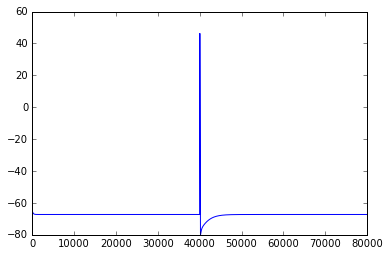

In [6]:
mod1.inject_square_current({'amplitude': 5*nA, 'delay': 1*s, 'duration': 1*ms})

g.plot(mod1.get_membrane_potential())

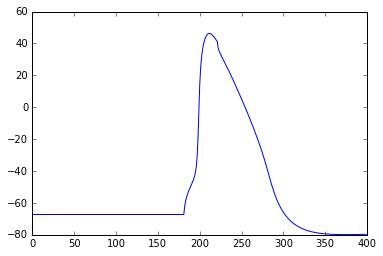

In [7]:
g.plot(mod1.get_APs()[0])

### Define tests to run

In [8]:
# Define which cell's properties to get
# 'nlx_anat_100201' is from Olfactory bulb mitral cell, 
# obtained from http://neuroelectro.org/neuron/129/ (Details)
neuron = {'nlex_id': 'nlx_anat_100201'} 

# Define injection current
i = {'injected_square_current': {'amplitude':5*nA, 'delay':1000*ms, 'duration':2000*ms } }

# Define the tests to perform on the cell
testTypes = [ \
    [InputResistanceTest, None],
    [RestingPotentialTest, None],
    [InjectedCurrentAPWidthTest, i], \
    [InjectedCurrentAPThresholdTest, i], \
    [InjectedCurrentAPAmplitudeTest, i],
]
     
tests = []

### Obtain Pooled Property Values from NeuroElectro.org

In [10]:
# Fetch NeuroElectro property values for each test
for t in xrange(len(testTypes)):
    testType = testTypes[t][0]
    params = testTypes[t][1]
    
    # Get the observations: property means and stds
    obs = testType.neuroelectro_pooled_observation(neuron,quiet=False)
    
    # Create a test instance using the observations
    test = testType(obs)
    
    if(params is not None):
        test.params = params
    
    tests.append(test)
    
# Create a test suite    
suite = sciunit.TestSuite("Migliore 2014 Tests", tests)

Getting data values from neuroelectro.org
http://www.neuroelectro.org/api/1/nedm/?nlex=nlx_anat_100201&limit=999&e__name=Input+Resistance&


RuntimeError: No data was returned by the NeuroElectro API

### Evaluate the model

In [ ]:
score = suite.judge(mod1)
score.view()

In [ ]:
score.values

In [ ]:
g.plot(mod1.get_membrane_potential())